In [143]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

### Problem 4

In [24]:
def p4_reg(vec):
    x = vec[:-1]
    x = sm.add_constant(x)
    y = vec[1:]
    
    model = sm.OLS(y,x).fit()
    return model

data = pd.read_excel('A1_data.xlsx', skiprows=1)
returns = data.Ret.values - 1
tbills = data.r90.values

print(p4_reg(returns).summary())
print(p4_reg(tbills).summary())
print(p4_reg(returns-tbills).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02737
Date:                Thu, 16 Oct 2025   Prob (F-statistic):              0.869
Time:                        13:13:18   Log-Likelihood:                 19.771
No. Observations:                  95   AIC:                            -35.54
Df Residuals:                      93   BIC:                            -30.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1199      0.024      5.015      0.0

### Problem 5

In [180]:
data = pd.read_excel('A1_data.xlsx', skiprows=1)
raw_returns = data.Ret
raw_returnsx = data.Retx
dp_ratio = (returns - returnsx) * 1/(1+returnsx)
tbills = data.r90
data['Pt'] = raw_returnsx.cumprod()
prices = data.Pt

results_r2 = np.zeros([10,3])
results_b  = np.zeros([10,3])
results_t  = np.zeros([10,3])

for j in range(1,11):
    returns_j = raw_returns.rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    tbills_j = (tbills + 1).rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    excess_returns_j = returns_j - tbills_j
    dividend_ratio_j = (dp_ratio.values[j:]*prices.values[j:])/ (dp_ratio.values[:-j]*prices.values[:-j])
    
    x = dp_ratio.values[:-j]
    x = sm.add_constant(x)
    ys = [returns_j, excess_returns_j, dividend_ratio_j]
    for i, y in enumerate(ys):
        try:
            model = sm.OLS(y.values,x).fit()
        except AttributeError:
            model = sm.OLS(y,x).fit()
        results_r2[j-1, i] = model.rsquared
        results_b[j-1, i] = model.params[1]
        results_t[j-1, i] = model.tvalues[1]

In [181]:
print(results_r2*100)
print('='*50)
print(results_b)
print('='*50)
print(results_t)

[[ 4.45246006  4.19823381  0.03358779]
 [ 7.2315376   6.62480637  0.55259572]
 [10.52777534  9.51643107  0.7183684 ]
 [14.17308766 12.96949923  0.51277038]
 [14.74384791 13.66990351  0.61777337]
 [17.19956728 16.22904868  0.92354082]
 [20.71129763 19.92622942  0.54686833]
 [22.23937849 21.85568762  0.1319495 ]
 [23.78089083 23.87533674  0.18872529]
 [26.29747889 26.89163417  0.14134495]]
[[ 2.60830854  2.577179   -0.1724387 ]
 [ 5.18263804  5.0638281  -1.03287741]
 [ 7.92098963  7.68822101 -1.37479119]
 [11.87490892 11.55982747 -1.40040418]
 [14.74986536 14.37290057 -1.69671758]
 [18.55575525 18.11790247 -2.28049025]
 [23.99661702 23.53275755 -1.90135071]
 [29.98617381 29.65337133 -1.02861004]
 [36.47356911 36.39598068 -1.30192291]
 [45.71087088 45.89460176 -1.18199553]]
[[ 2.08176516  2.01877551 -0.17676861]
 [ 2.67799066  2.55484614 -0.71499161]
 [ 3.27223799  3.09366218 -0.81144643]
 [ 3.85515414  3.66224266 -0.68108145]
 [ 3.92317391  3.75402028 -0.74379839]
 [ 4.27546931  4.128964

In [122]:
returns_j = raw_returns - 1
x = returns_j.values[:-1]
x = sm.add_constant(x)
y = returns_j[1:]
model = sm.OLS(y.values,x).fit()

y_hat = model.predict(x)
print(np.mean(y))
print(np.std(y))
print(np.std(y_hat))

0.12199677112998741
0.19653699645266337
0.003371098495997357


In [182]:
### b, non overlapping regression

results_r2_b = np.zeros([10,3])
results_b_b  = np.zeros([10,3])
results_t_b  = np.zeros([10,3])

for j in range(1,11):
    returns_j = raw_returns.rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    tbills_j = (tbills + 1).rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    excess_returns_j = returns_j - tbills_j
    dividend_ratio_j = (dp_ratio.values[j:]*prices.values[j:])/ (dp_ratio.values[:-j]*prices.values[:-j])
    
    x = dp_ratio.values[:-j][::j]
    x = sm.add_constant(x)
    ys = [returns_j, excess_returns_j, dividend_ratio_j]
    for i, y in enumerate(ys):
        try:
            model = sm.OLS(y.values[::j],x).fit()
        except AttributeError:
            model = sm.OLS(y[::j],x).fit()
        results_r2_b[j-1, i] = model.rsquared
        results_b_b[j-1, i] = model.params[1]
        results_t_b[j-1, i] = model.tvalues[1]

In [183]:
print(results_r2_b*100)
print('='*50)
print(results_b_b)
print('='*50)
print(results_t_b)

[[ 4.45246006  4.19823381  0.03358779]
 [ 6.31427232  5.63680796  0.49910505]
 [19.99209763 20.28326334  0.05416025]
 [10.56472207  8.31886438  2.07183467]
 [15.71107084 15.62597384  5.93117058]
 [18.32658167 19.90967302  1.1992657 ]
 [19.59131949 17.99708609  0.47477571]
 [27.63956736 29.42875812  0.75067671]
 [22.32192686 23.52571992  4.11479244]
 [ 1.32774327  1.07658963  6.58346578]]
[[  2.60830854   2.577179    -0.1724387 ]
 [  5.1824745    5.0075989   -1.15169404]
 [ 10.64607582  10.847959    -0.34856289]
 [  9.95267555   8.70754755  -3.67736974]
 [ 13.9444637   14.65862805  -5.64442267]
 [ 18.62871564  19.40545669  -2.78214268]
 [ 23.73412045  23.16295906  -2.07313198]
 [ 32.78054964  32.83213195   2.53394499]
 [ 34.88921043  32.58247453  -5.77738655]
 [ 14.42314768  12.51181507 -16.07657357]]
[[ 2.08176516  2.01877551 -0.17676861]
 [ 1.74153094  1.63953829 -0.47510407]
 [ 2.69191746  2.71639647 -0.12535942]
 [ 1.57501341  1.3803896  -0.666551  ]
 [ 1.78009051  1.77436769 -1.035

In [138]:
### c, heterokedastic errors

results_t_c  = np.zeros([10,3])

for j in range(1,11):
    returns_j = raw_returns.rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    tbills_j = (tbills + 1).rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
    excess_returns_j = returns_j - tbills_j
    dividend_ratio_j = (dp_ratio.values[j:]*prices.values[j:])/ (dp_ratio.values[:-j]*prices.values[:-j])
    
    x = dp_ratio.values[:-j][::j]
    x = sm.add_constant(x)
    ys = [returns_j, excess_returns_j, dividend_ratio_j]
    for i, y in enumerate(ys):
        try:
            model = sm.OLS(y.values[::j],x).fit()
        except AttributeError:
            model = sm.OLS(y[::j],x).fit()
        model = model.get_robustcov_results(cov_type='HAC', maxlags=j)
        results_t_c[j-1, i] = model.tvalues[1]

In [139]:
results_t_c

array([[ 2.26648473,  2.15172881, -0.17224275],
       [ 2.77526684,  2.38348293, -0.60012365],
       [ 3.64422802,  3.20863172, -0.23425368],
       [ 2.70953293,  1.74035904, -1.44493526],
       [ 2.90782272,  2.16671249, -2.81692543],
       [ 3.17352941,  2.59564682, -0.84775993],
       [ 2.36718207,  2.08680579, -0.42187649],
       [ 7.41225156,  4.13595732,  1.11971586],
       [ 3.74950278,  4.8554694 , -1.5001689 ],
       [ 0.58585356,  0.9116419 , -1.54712561]])

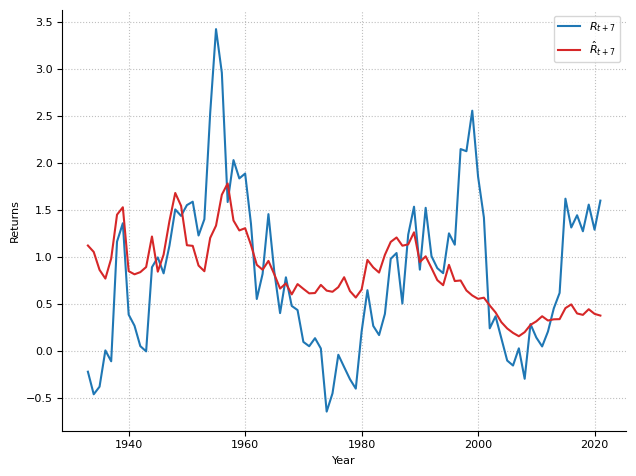

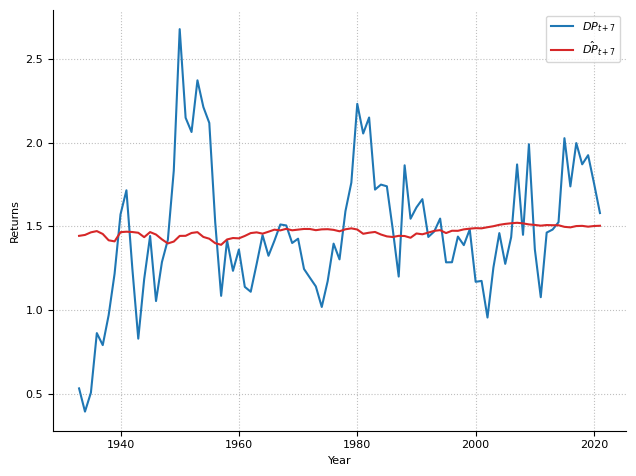

In [185]:
### c, plot the actual and 7 year forecast

j=7
returns_j = raw_returns.rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
tbills_j = (tbills + 1).rolling(j).apply(lambda x: x.prod(), raw=True)[j:] - 1
excess_returns_j = returns_j - tbills_j
dividend_ratio_j = (dp_ratio.values[j:]*prices.values[j:])/ (dp_ratio.values[:-j]*prices.values[:-j])

x = dp_ratio.values[:-j]
x = sm.add_constant(x)
y = excess_returns_j

model = sm.OLS(y.values,x).fit()
y_hat = model.predict(x)

label = data.year.values[j:]
plt.plot(label, y, label=r'$R_{t+7}$')
plt.plot(label, y_hat, label=r'$\hat{R}_{t+7}$', color='tab:red')
plt.legend()
plt.ylabel('Returns')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('p5c1.pdf')
plt.show()

x = dp_ratio.values[:-j]
x = sm.add_constant(x)
y = dividend_ratio_j

model = sm.OLS(y,x).fit()
y_hat = model.predict(x)

label = data.year.values[j:]
plt.plot(label, y, label=r'$DP_{t+7}$')
plt.plot(label, y_hat, label=r'$\hat{DP}_{t+7}$', color='tab:red')
plt.legend()
plt.ylabel('Returns')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('p5c2.pdf')
plt.show()

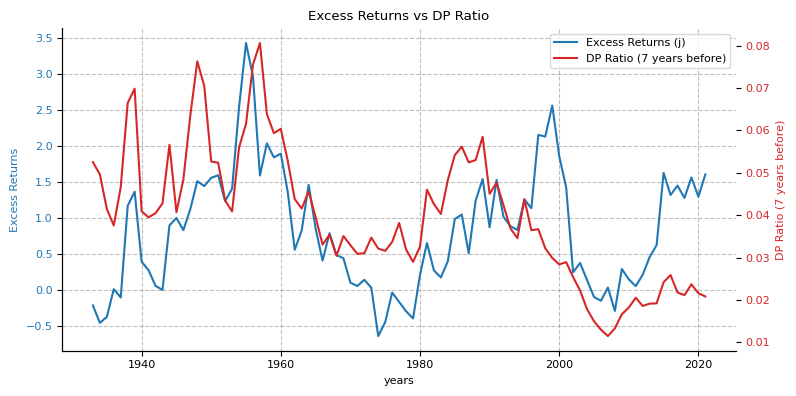

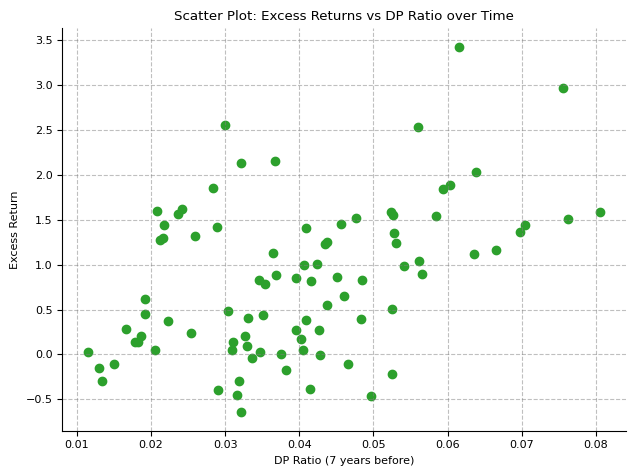

In [186]:
## d R_t+7 and DP_t & scatter

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the first series
ax1.plot(label, excess_returns_j, color='tab:blue', label='Excess Returns (j)')
ax1.set_xlabel('years')
ax1.set_ylabel('Excess Returns', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(label, dp_ratio[:-j], color='tab:red', label='DP Ratio (7 years before)')
ax2.set_ylabel('DP Ratio (7 years before)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and grid
plt.title('Excess Returns vs DP Ratio')
ax1.grid(True, linestyle='--', alpha=0.5)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.grid(False)
plt.tight_layout()
plt.savefig('p5d1.pdf')
plt.show()

plt.scatter(dp_ratio[:-j], excess_returns_j, color='tab:green', marker='o')

# Labels and title
plt.xlabel('DP Ratio (7 years before)')
plt.ylabel('Excess Return')
plt.title('Scatter Plot: Excess Returns vs DP Ratio over Time')

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('p5d2.pdf')

plt.show()


### Problem 6

In [179]:
data = pd.read_excel('A1_data.xlsx', skiprows=1)
raw_returns = data.Ret
raw_returnsx = data.Retx
dp_ratio = (returns - returnsx) * 1/(1+returnsx)
tbills = data.r90
data['Pt'] = raw_returnsx.cumprod()
prices = data.Pt

log_returns = np.log(raw_returns)
log_dp = np.log(dp_ratio)
log_dividend_ratio = np.log((dp_ratio.values[1:]*prices.values[1:])/ (dp_ratio.values[:-1]*prices.values[:-1]))

x = log_dp.values
x = sm.add_constant(x)
y = log_returns

model = sm.OLS(y.values,x).fit()
print(model.summary())

x = log_dp.values[:-1]
x = sm.add_constant(x)
y = log_dividend_ratio

model = sm.OLS(y,x).fit()
print(model.summary())

x = log_dp.values[:-1]
x = sm.add_constant(x)
y = log_dp[1:]

model = sm.OLS(y.values,x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4367
Date:                Fri, 17 Oct 2025   Prob (F-statistic):              0.510
Time:                        12:15:39   Log-Likelihood:                 23.186
No. Observations:                  96   AIC:                            -42.37
Df Residuals:                      94   BIC:                            -37.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.148      0.009      0.9